# House Price Study Notebook

## Objectives

*   Answer business requirement 1: 
    * The client is interested in discovering how house attributes correlate with sale prices. Therefore, the client expects data visualizations of the correlated variables against the sale price.

## Inputs

* outputs/datasets/collection/house_prices_records.csv

## Outputs

* generate code that answers business requirement 1 and can be used to build the Streamlit App






---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir


'/workspaces/heritage-housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing'

---

# Load Data

In [5]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/house_prices_records.csv"))
df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854,3,No,706,GLQ,150,0,548,RFn,...,65,196,61,5,7,856,0,2003,2003,208500
1,1262,0,3,Gd,978,ALQ,284,0,460,RFn,...,80,0,0,8,6,1262,0,1976,1976,181500
2,920,866,3,Mn,486,GLQ,434,0,608,RFn,...,68,162,42,5,7,920,0,2001,2002,223500


# Data Exploration

In [6]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation Study

Use OneHotEncoder to encode all values as integers, so the data can be used in a correlation study.

(The code for this function is borrowed from the CI Walkthrough projects.)

In [7]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(20)

(1460, 42)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,...,BsmtFinType1_LwQ,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_No,GarageFinish_Fin,GarageFinish_None,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,854,3,706,150,0,548,2003,1710,8450,...,0,1,0,0,0,0,1,0,0,0
1,1262,0,3,978,284,0,460,1976,1262,9600,...,0,1,0,0,0,0,0,1,0,0
2,920,866,3,486,434,0,608,2001,1786,11250,...,0,1,0,0,0,0,1,0,0,0
3,961,0,0,216,540,0,642,1998,1717,9550,...,0,0,1,0,0,0,1,0,0,0
4,1145,0,4,655,490,0,836,2000,2198,14260,...,0,1,0,0,0,0,1,0,0,0
5,796,566,1,732,64,0,480,1993,1362,14115,...,0,0,1,0,0,0,0,1,0,0
6,1694,0,3,1369,317,0,636,2004,1694,10084,...,0,1,0,0,0,0,1,0,0,0
7,1107,983,3,859,216,0,484,1973,2090,10382,...,0,0,0,1,0,0,0,1,0,0
8,1022,752,2,0,952,0,468,1931,1774,6120,...,0,0,1,0,0,0,0,1,0,0
9,1077,0,2,851,140,0,205,1939,1077,7420,...,0,1,0,0,0,0,0,1,0,0


Inspect the DataFrame, all values are now integers:

In [8]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   1stFlrSF           1460 non-null   int64
 1   2ndFlrSF           1460 non-null   int64
 2   BedroomAbvGr       1460 non-null   int64
 3   BsmtFinSF1         1460 non-null   int64
 4   BsmtUnfSF          1460 non-null   int64
 5   EnclosedPorch      1460 non-null   int64
 6   GarageArea         1460 non-null   int64
 7   GarageYrBlt        1460 non-null   int64
 8   GrLivArea          1460 non-null   int64
 9   LotArea            1460 non-null   int64
 10  LotFrontage        1460 non-null   int64
 11  MasVnrArea         1460 non-null   int64
 12  OpenPorchSF        1460 non-null   int64
 13  OverallCond        1460 non-null   int64
 14  OverallQual        1460 non-null   int64
 15  TotalBsmtSF        1460 non-null   int64
 16  WoodDeckSF         1460 non-null   int64
 17  YearBuilt     

Investigate correlation using Spearman and Pearson method.
Code borrowed from CI walkthrough project.

In [9]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual       0.809829
GrLivArea         0.731310
YearBuilt         0.652682
GarageArea        0.649379
GarageYrBlt       0.634095
TotalBsmtSF       0.602725
KitchenQual_TA   -0.581803
1stFlrSF          0.575408
YearRemodAdd      0.571159
KitchenQual_Gd    0.478583
Name: SalePrice, dtype: float64

In [10]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.790982
GrLivArea         0.708624
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
YearBuilt         0.522897
KitchenQual_TA   -0.519298
YearRemodAdd      0.507101
KitchenQual_Ex    0.504094
MasVnrArea        0.472614
Name: SalePrice, dtype: float64

The top 5 features that are most strongly correlated with `SalePrice` are:

'OverallQual'

'GrLivArea'

'GarageArea'

'TotalBsmtSF'

'1stFlrSF'


We plot the distribution on a heatmap to visualize the correlation.

In [16]:
%matplotlib inline

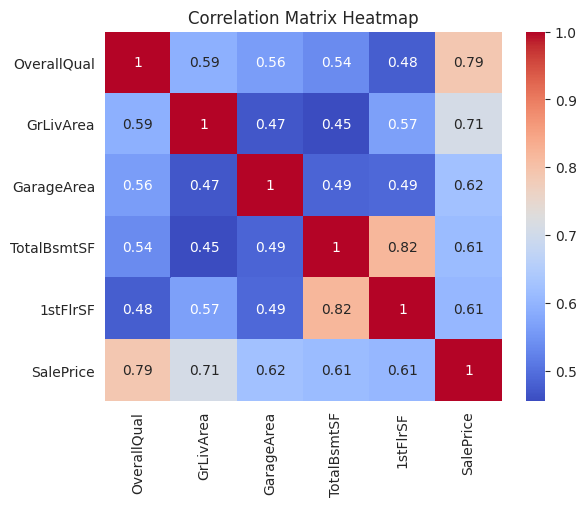

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top 5 variables with highest correlation with SalePrice
corr = df.corr()
top_corr_features = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'SalePrice']

# Plot heat map
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()


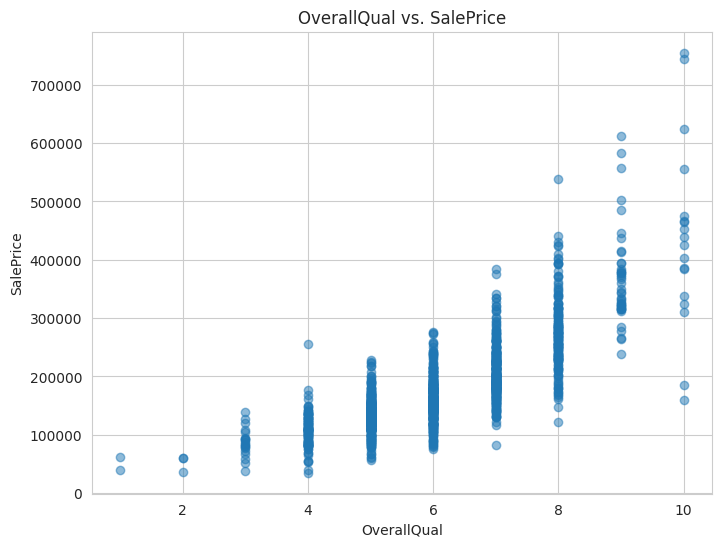

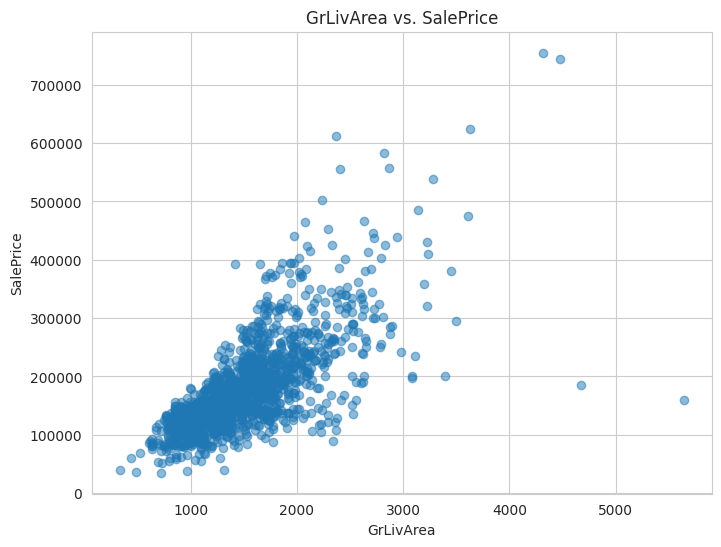

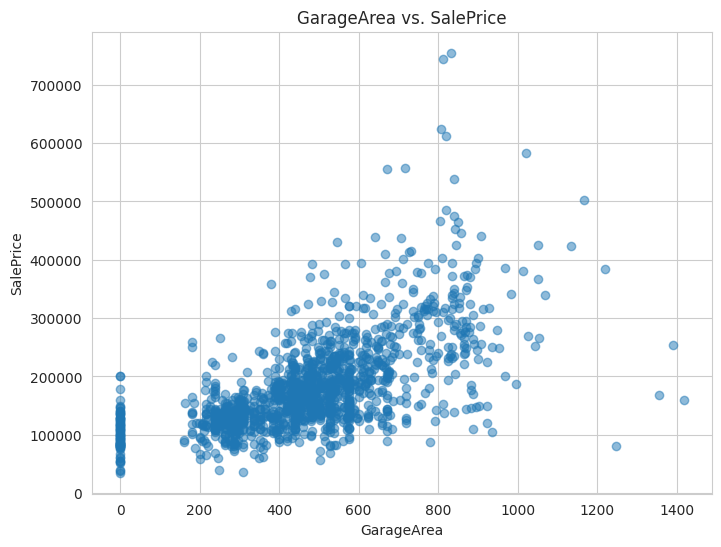

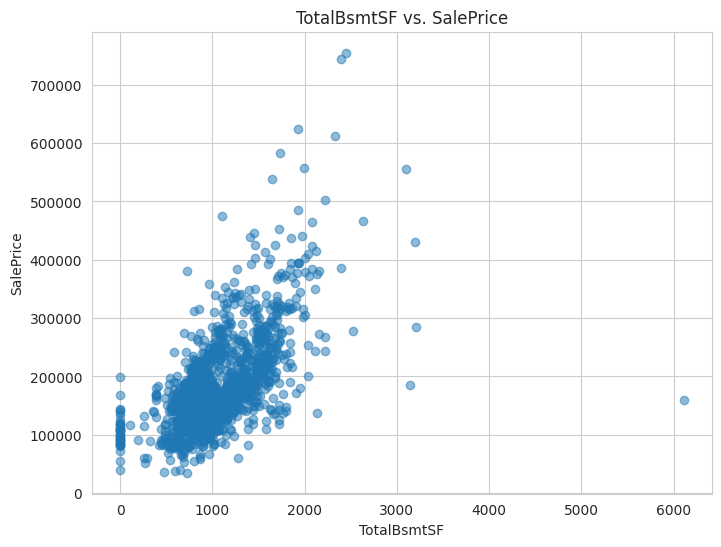

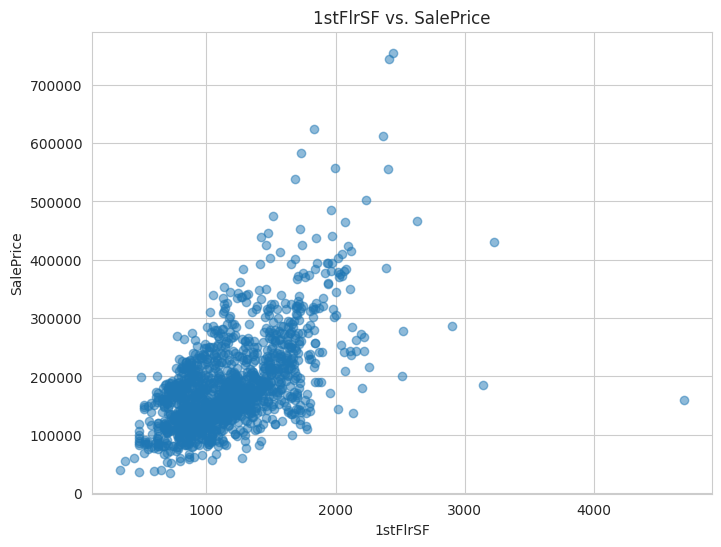

In [22]:
import matplotlib.pyplot as plt

# select the top 5 variables that are most strongly correlated with SalePrice
top_5_vars = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']

# create scatterplots showing the relationship between each variable and SalePrice
for var in top_5_vars:
    plt.figure(figsize=(8,6))
    plt.scatter(df[var], df['SalePrice'], alpha=0.5)
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.title(f'{var} vs. SalePrice')
    plt.show()


---

# Conclusions and Next steps

* House prices are most affected by the overall quality of the house, the total ground floor area and the total garage area.

Next step is to display these plots on the dashboard